# Machine Learning Sederhana


### 1. import library yang di perlukan


In [1]:
%matplotlib widget

import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

### 2. generate data


In [2]:
jumlah_data = 100
rasioForTen = 10 / jumlah_data

x = np.array([(i * rasioForTen) for i in range(jumlah_data)])
y = np.array([(i * rasioForTen) + (np.random.rand()) for i in range(jumlah_data)])

# development
# print({
#     'rasioForTen': rasioForTen,
#     'x': x,
#     'y': y,
# })
# fig, ax = plt.subplots()
# ax.spines['bottom'].set_position(('data',0))
# plt.scatter(x,y)
# plt.axis([0,10,0,10])
# plt.show()
# development

### 3. membuat fungsi yang dibutuhkan


In [3]:
def linearRegression(m,x):
    return (m * x)

# developement
# print(linearRegression(2,2))
# developement

### 4. menghitung prediksi


In [4]:
m_awal = 10 # m_awal disini sengaja di set salah, jadi biarkan code yang menyelesaikanya
m_prediksi = m_awal
x_prediksi = np.array([0,10])
y_prediksi = linearRegression(x_prediksi,m_prediksi)

# development
# print({
#     'm_prediksi': m_prediksi,
#     'x_prediksi': x_prediksi,
#     'y_prediksi': y_prediksi,
# })
# raise SystemExit 
# development


result_list_prediksi = []
m_list_prediksi = []
x_list_prediksi = []
y_list_prediksi = []
learning_rate = 0.1

for i in range(1, jumlah_data):
    # dapatkan x_actual , y_actual , y_prediksi
    x_actual = x[i]
    y_actual = y[i]
    y_prediksi = linearRegression(x_actual,m_prediksi)
    step1 = {
        'action': 'dapatkan x_actual , y_actual , y_prediksi',
        'm_prediksi_before': m_prediksi,
        'x_actual': x_actual,
        'y_actual': y_actual,
        'y_prediksi': y_prediksi,
    }
    # dapatkan x_actual , y_actual , y_prediksi

    # hitung error dan dapatkan delta gradient nya
    error = y_actual - y_prediksi # −9.7389
    delta_m = error / x_actual # −97.389
    delta_m *= learning_rate
    step2 = {
        'action': 'hitung error dan dapatkan delta gradient nya',
        'error': error,
        'delta_m_before': error / x_actual,
        'learning_rate': learning_rate,
        'delta_m': delta_m,
    }
    # hitung error dan dapatkan delta gradient nya
    
    # update gradient dari error yang di dapat
    m_prediksi_before = m_prediksi
    m_prediksi += delta_m
    step3 = {
        'action': 'update gradient dari error yang di dapat',
        'm_prediksi_before': m_prediksi_before,
        'm_prediksi': m_prediksi,
    }
    # update gradient dari error yang di dapat

    # setelah gradient telah di perbarui dari error yang di dapat, hitung lagi fungsi linear aggression dari gradient yang terbaru
    m_list_prediksi.append(m_prediksi)
    x_list_prediksi.append(x_prediksi)
    y_list_prediksi.append(linearRegression(x_prediksi,m_prediksi))
    step4 = {
        'action': 'setelah gradient telah di perbarui dari error yang di dapat, hitung lagi fungsi linear aggression dari gradient yang terbaru',
        'm_prediksi': m_prediksi,
        'x_prediksi': x_prediksi.tolist(),
        'y_prediksi': linearRegression(x_prediksi,m_prediksi).tolist(),
    }
    # setelah gradient telah di perbarui dari error yang di dapat, hitung lagi fungsi linear aggression dari gradient yang terbaru

    result_list_prediksi.append({
        'step1': step1,
        'step2': step2,
        'step3': step3,
        'step4': step4,
    })

# development
with open('../Json/data.json','w') as f:
    json.dump(result_list_prediksi,f,indent=4)
# development


### 5. Visualisasi Prediksi

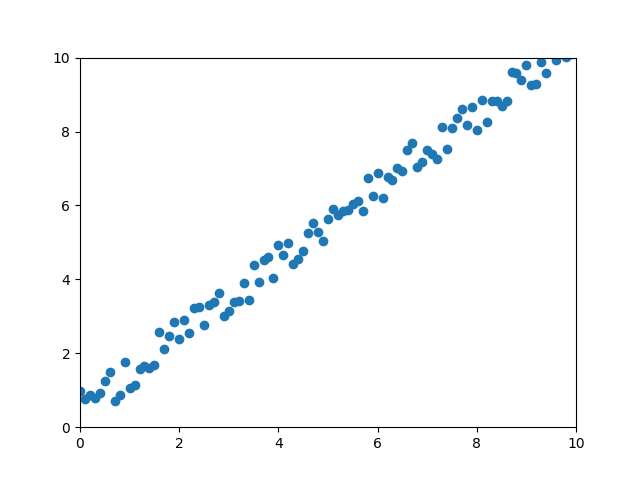

In [5]:
fig, ax = plt.subplots()
line, = plt.plot([],[],"r")

plt.scatter(x,y)
ax.axis([0,10,0,10])
text = ax.text(1,10.2,"")

def animate(frame):
    x_pred = x_list_prediksi[frame]
    y_pred = y_list_prediksi[frame]
    line.set_data(x_pred, y_pred)
    return line,

anim = FuncAnimation(
    fig=fig,
    func=animate,
    frames=jumlah_data,
    interval=100,
    repeat=False
)

plt.show()